In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [2]:
# creating database connection
conn = sqlite3.connect('E:/sqlite_db/inventory.db')

In [3]:
tables = pd.read_sql_query(
    "SELECT name FROM sqlite_master WHERE type='table';", conn
)
print(tables)

                   name
0       begin_inventory
1         end_inventory
2             purchases
3       purchase_prices
4                 sales
5        vendor_invoice
6  vendor_sales_summary


So, here we can see, all the tables we previously uploaded are present

In [4]:
df = pd.read_sql_query("SELECT * FROM vendor_sales_summary", conn)
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,7245,PROXIMO SPIRITS INC.,3065,Three Olives Grape Vodka,0.71,0.99,50.0,1,0.71,86.0,8.514000e+01,33.66,4.46,38994.78,84.43,99.166079,86.000000,119.915493
1,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,1.432800e+02,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388
2,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.980000e+00,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
3,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,6.566000e+01,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
4,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,1.595000e+01,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
10688,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
10689,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
10690,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830


# Exploratory Data Analysis

- Previously we examined the various tables in the database to identify key variables, understand their relationships and determine which ones should be included in the final analysis.
<br>

- In this phase of EDA, we will analyze the resultant table to gain insights into distribution of each column. This will help us understand data patterns, identify anomaliesand ensure data quality before proceeding with further analysis.

In [5]:
# Summary statistics
df.describe().T         # the .T is to transpose and have the column names vertocally

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


- Somewhere there a division by 0 occured in the ProfitMargin column, that's why there is infinite value.
<br> 

- There were cases where the incentory made loss, that's why there is negative value in GrossProfit column.
<br>

- The cases where TotalSalesQuantity is 0, signifies there were products purchased but never sold

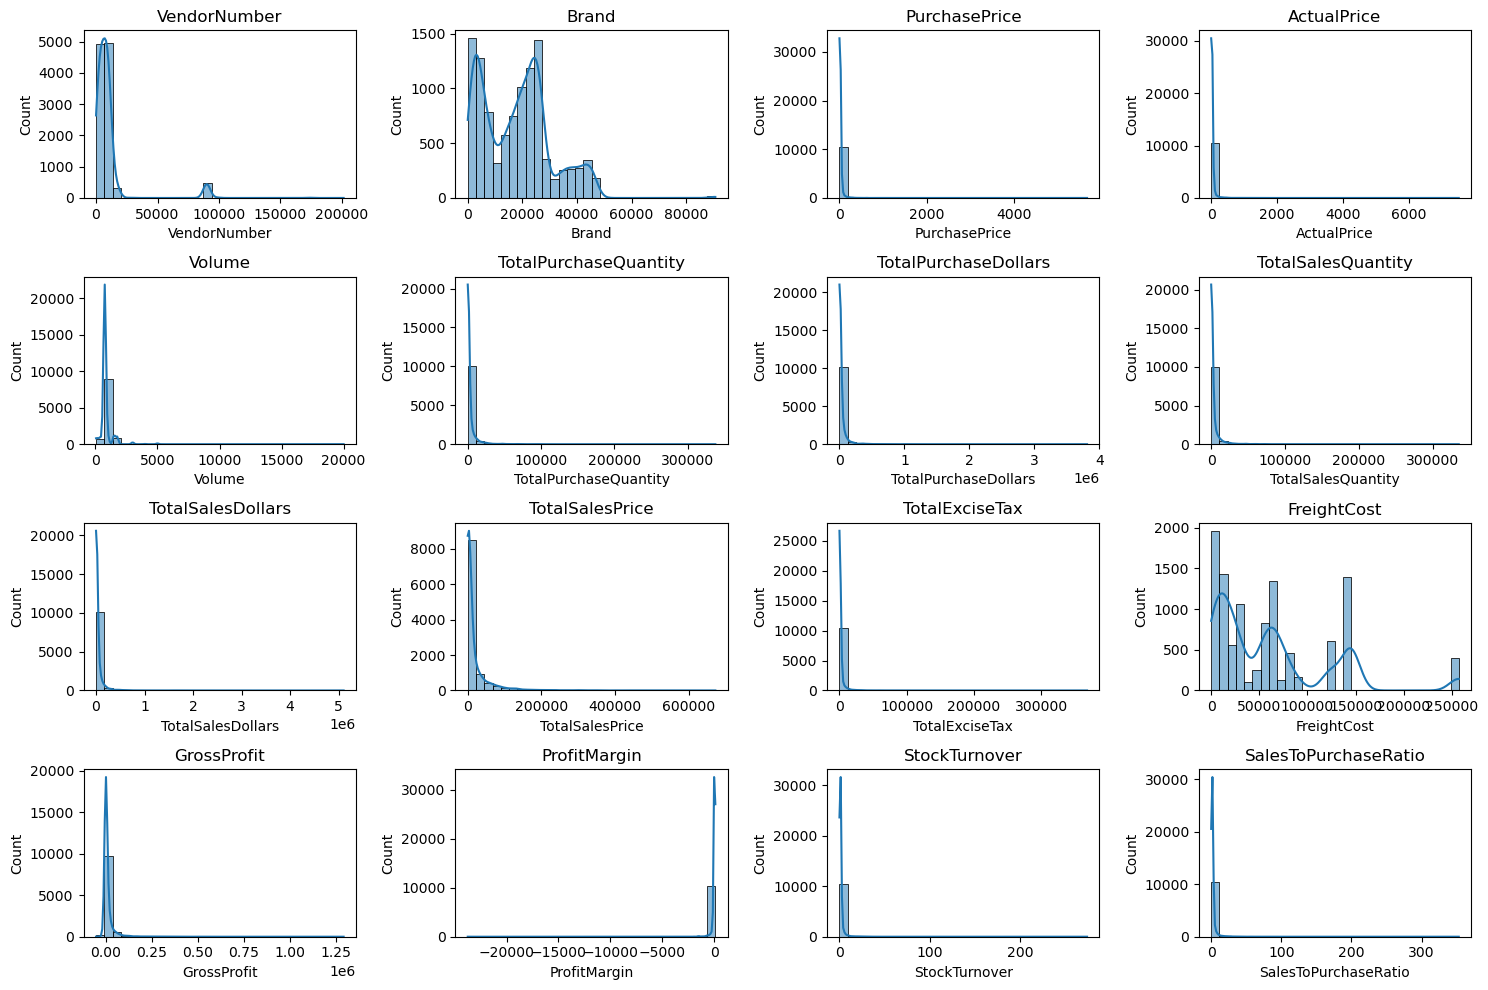

In [6]:
# So now we shall plot some graphs to see the distributions of the numerical columns
numerical_columns = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_columns):
    plt.subplot(4, 4, i+1)          # adjusting grid layout as needed
    sb.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

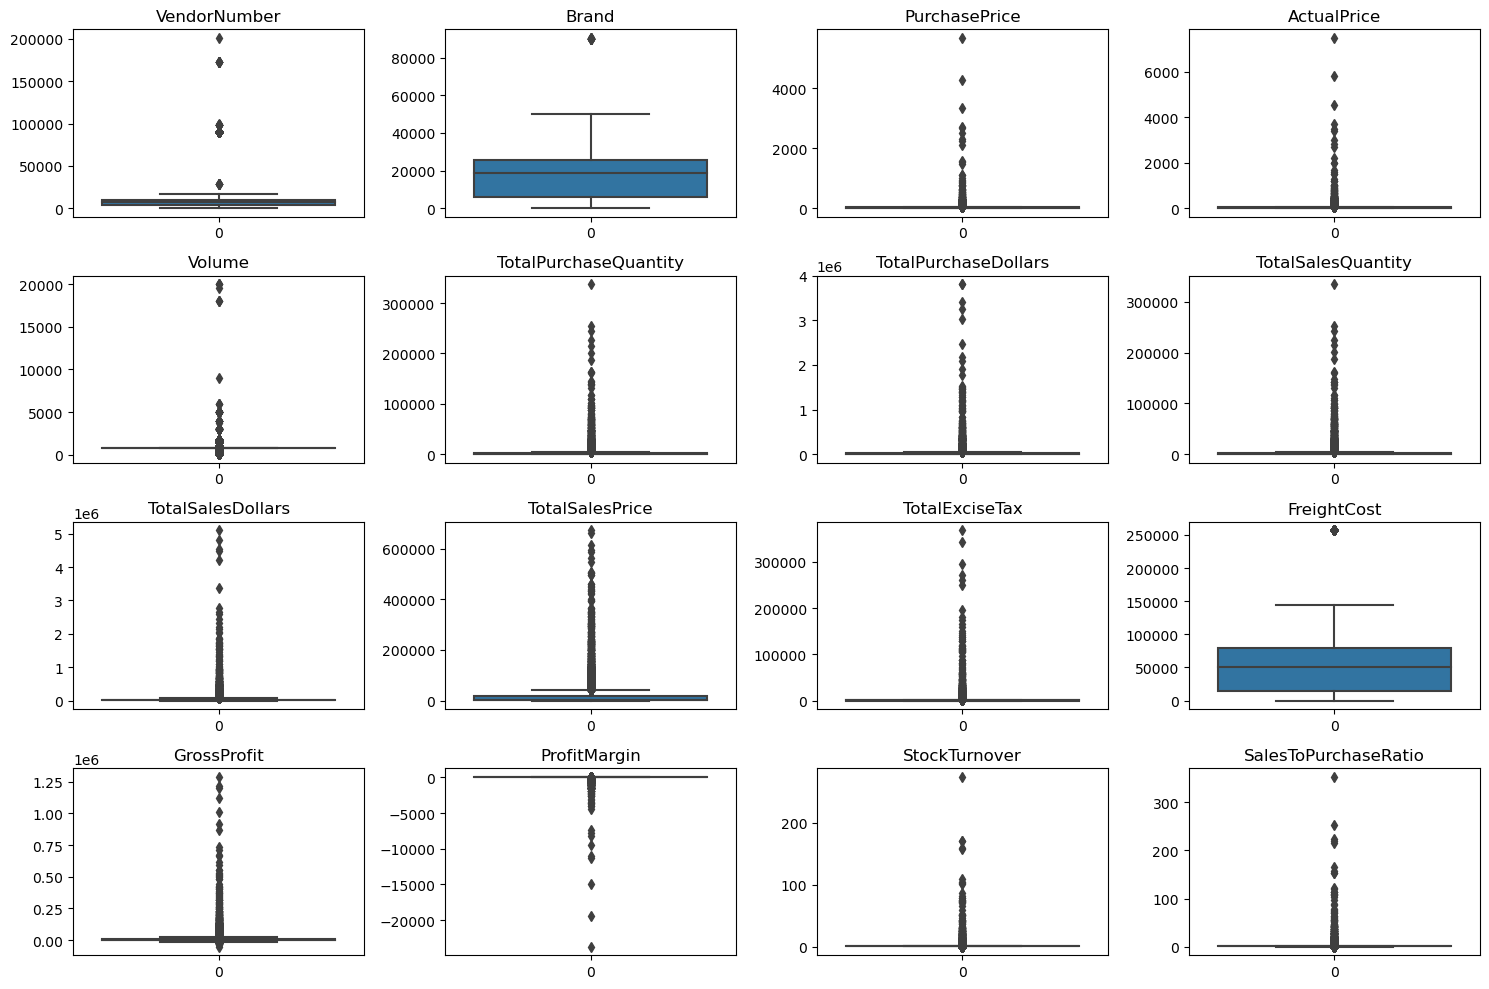

In [7]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_columns):
    plt.subplot(4, 4, i+1)          # adjusting grid layout as needed
    sb.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


# Summary Statistics Insights:
## Negative & Zero Values:
- Gross Profit: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price.
<br>

- Profit Margin: Has a minimum of -∞, which suggests cases where revenue is zero or even lower than costs.
<br>

- Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.
<br>
## Outliers Indicated by High Standard Deviations:
<br>

- Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.
<br>

- Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.
<br>

- Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that Sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.

In [8]:
# So we have tp focus on the records where grossprofit, profit margin, total sales quantity is greater than 0
df = pd.read_sql_query("""
                        SELECT * FROM vendor_sales_summary 
                        WHERE
                        GrossProfit > 0 AND
                        ProfitMargin > 0 AND
                        TotalSalesQuantity > 0""", conn)

df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,7245,PROXIMO SPIRITS INC.,3065,Three Olives Grape Vodka,0.71,0.99,50.0,1,0.71,86.0,8.514000e+01,33.66,4.46,38994.78,84.43,99.166079,86.000000,119.915493
1,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,1.432800e+02,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388
2,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.980000e+00,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
3,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,6.566000e+01,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
4,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,1.595000e+01,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
8561,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
8562,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
8563,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830


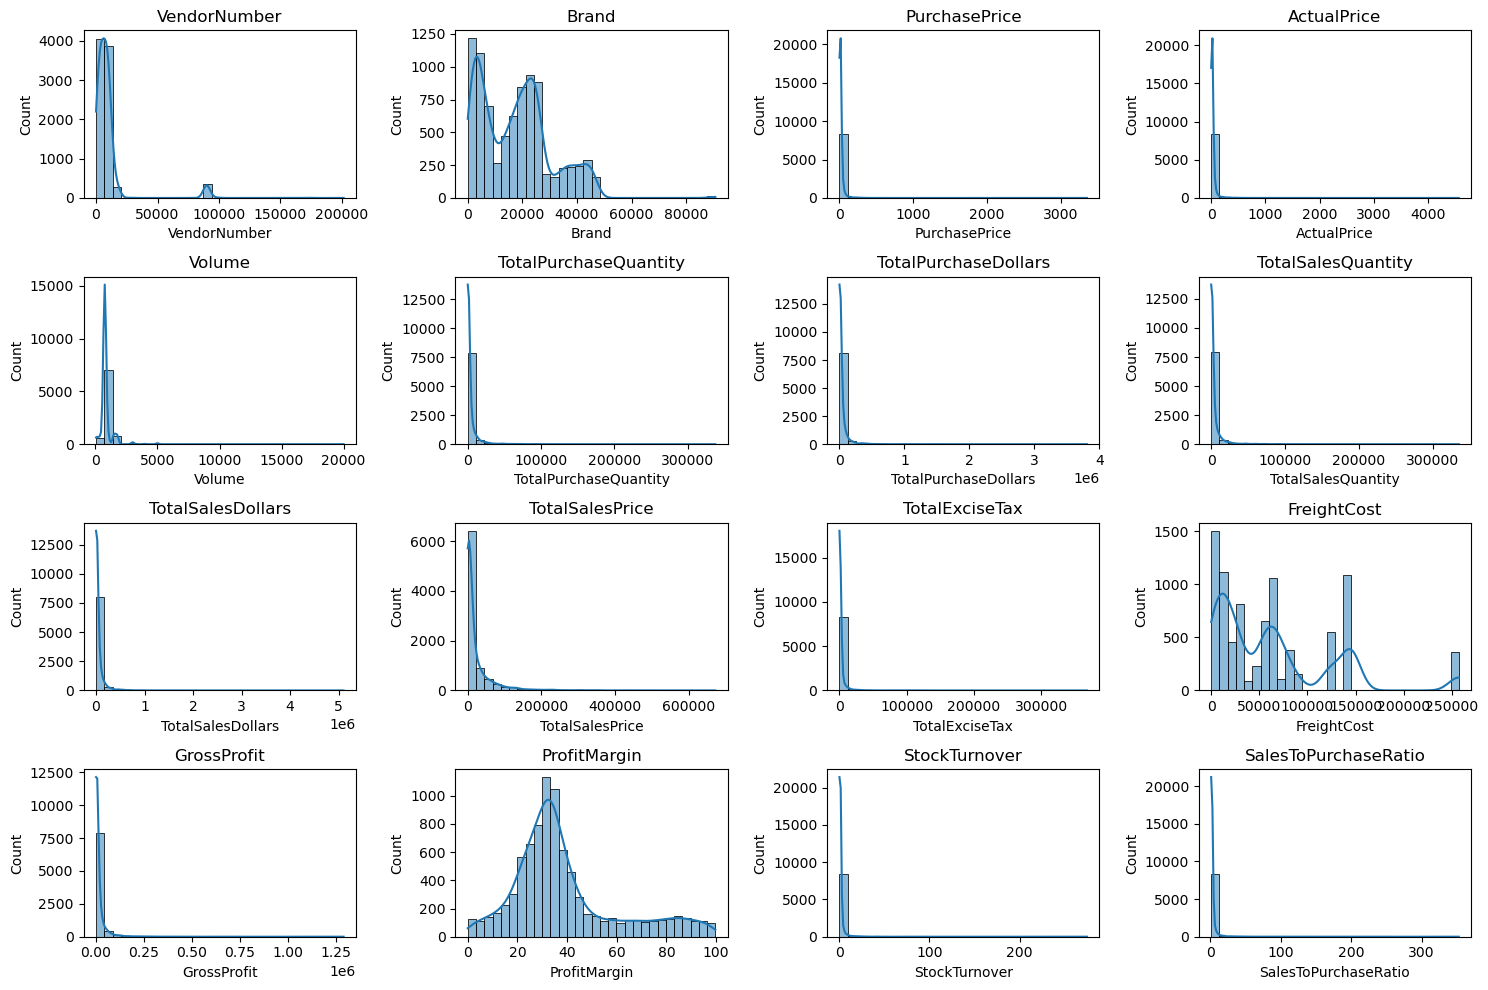

In [9]:
# So now we shall plot some graphs to see the distributions of the numerical columns
numerical_columns = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_columns):
    plt.subplot(4, 4, i+1)          # adjusting grid layout as needed
    sb.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

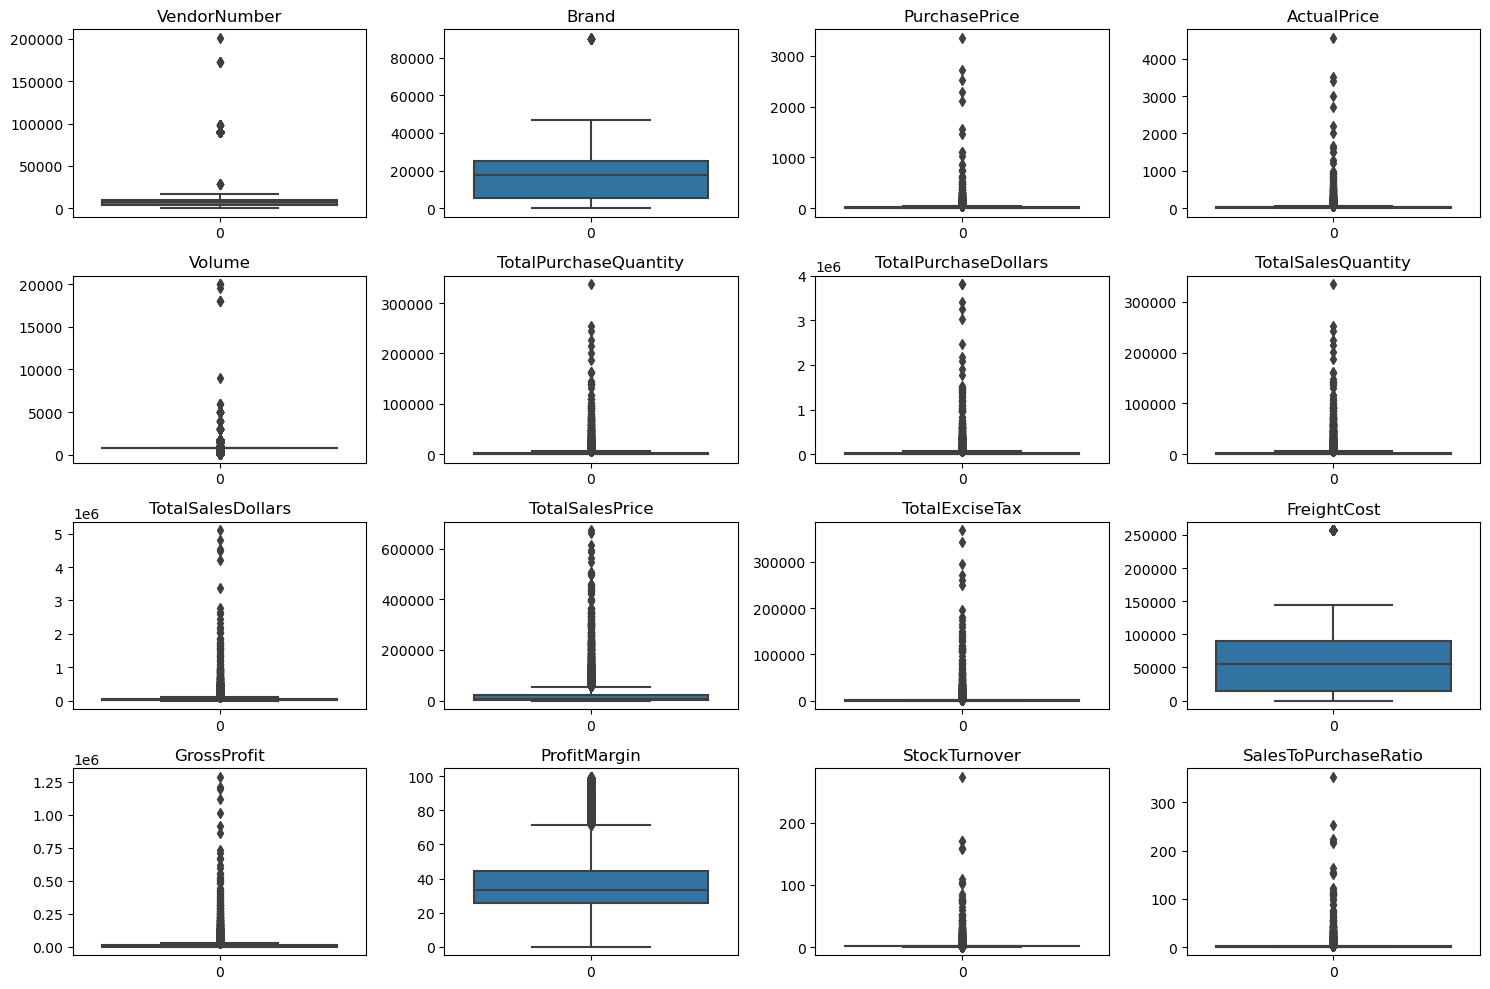

In [10]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_columns):
    plt.subplot(4, 4, i+1)          # adjusting grid layout as needed
    sb.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

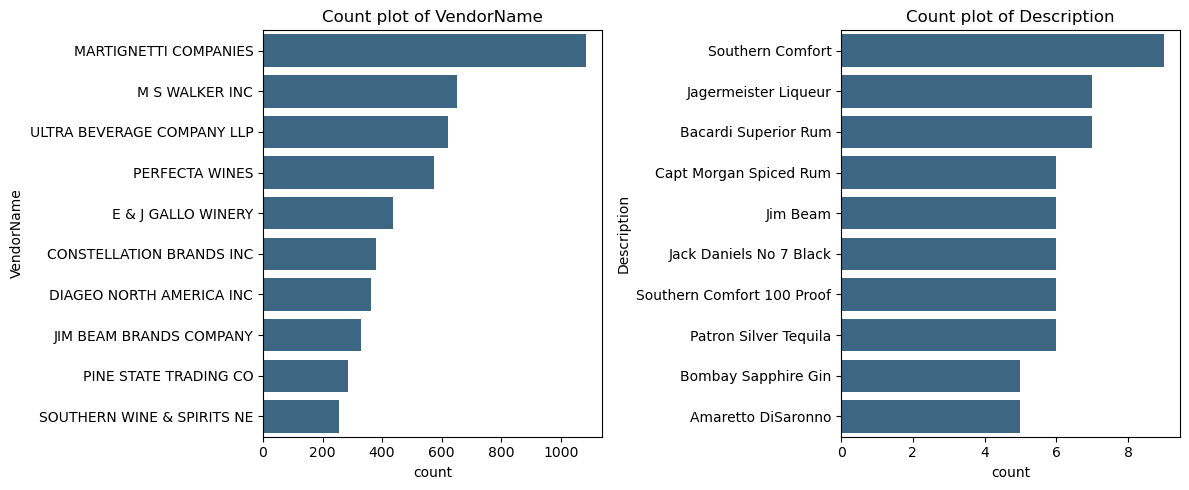

In [11]:
# Now let's analyze some categorical columns
categorical_columns = ["VendorName", "Description"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_columns):
    plt.subplot(1, 2, i+1)
    sb.countplot(y=df[col], order=df[col].value_counts().index[:10], color='#31688e')   # top 10 categories
    plt.title(f"Count plot of {col}")

plt.tight_layout()
plt.show()

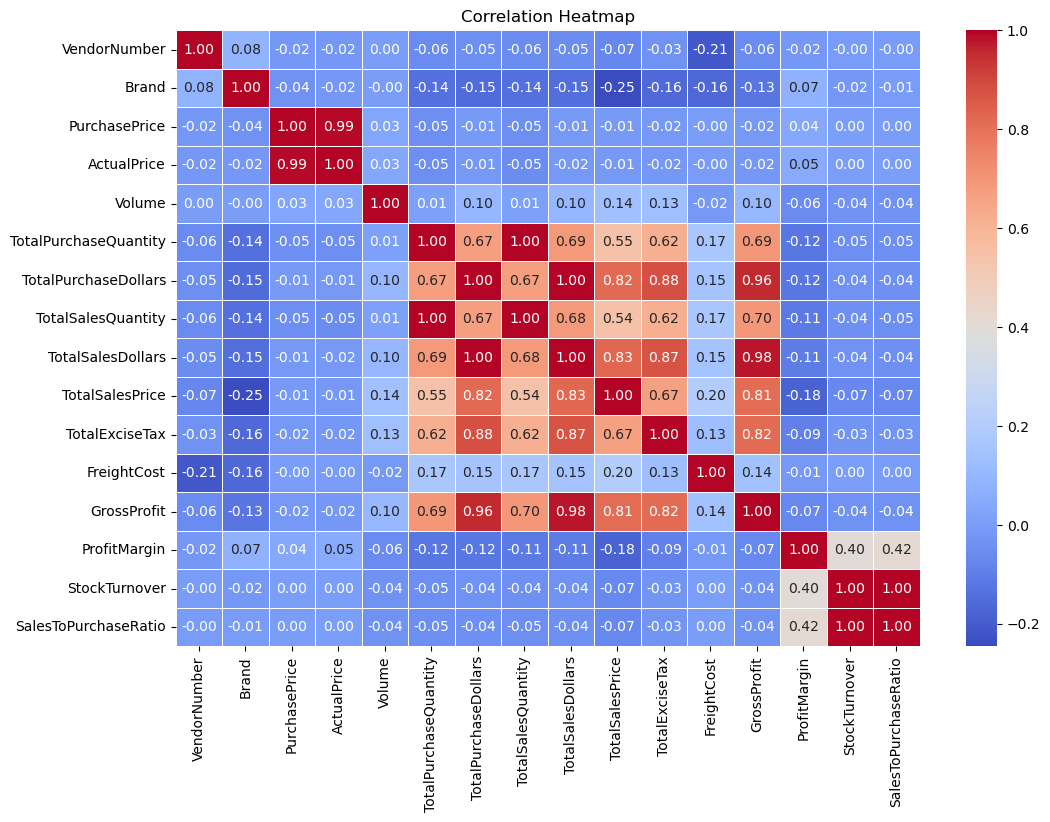

In [12]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df [numerical_columns].corr()
sb.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5) 
plt.title("Correlation Heatmap")
plt.show()

# Correlation Insights
- PurchasePrice has weak correlations with TotalSalesDollars (-0.012) and GrossProfit (-0.016), suggesting that price variations do not significantly impact sales revenue or profit.
<br>

- Strong correlation between TotalPurchaseQuantity and TotalSalesQuantity (0.999), confirming efficient inventory turnover.
<br>

- Negative correlation between ProfitMargin & TotalSalesPrice (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.
<br>

- StockTurnover has weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not necessarily result in higher profitability.

# Data Analysis

#### 1: Identify brands that need promotional or pricing adjustments which exhibit lower sales performance but higher profit margins.

In [13]:
brand_performance = df.groupby(['Description']).agg({
                'TotalSalesDollars':'sum',
                'ProfitMargin':'mean'}).reset_index()
brand_performance

,Description,TotalSalesDollars,ProfitMargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


Now for our calculation of question, we shall ttale the lower 15% of proucts for TotalSalesDollars and top 15% of products for ProfitMargin from the above data

In [14]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [15]:
low_sales_threshold    # products with sales less than this lie in the lower 15% of all the proucts sales

560.299

In [16]:
high_margin_threshold  # products with more than this percentateg gof profit margin lie in the top 15% of all products

64.97017552750111

In [17]:
# Filter brands with low sales but high profit margins
target_brands= brand_performance[
    (brand_performance [ 'TotalSalesDollars'] <= low_sales_threshold) & 
    (brand_performance ['ProfitMargin'] >= high_margin_threshold)]
print("Brands with Low Sales but High Profit Margins:")
display(target_brands.sort_values ('TotalSalesDollars'))

Brands with Low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


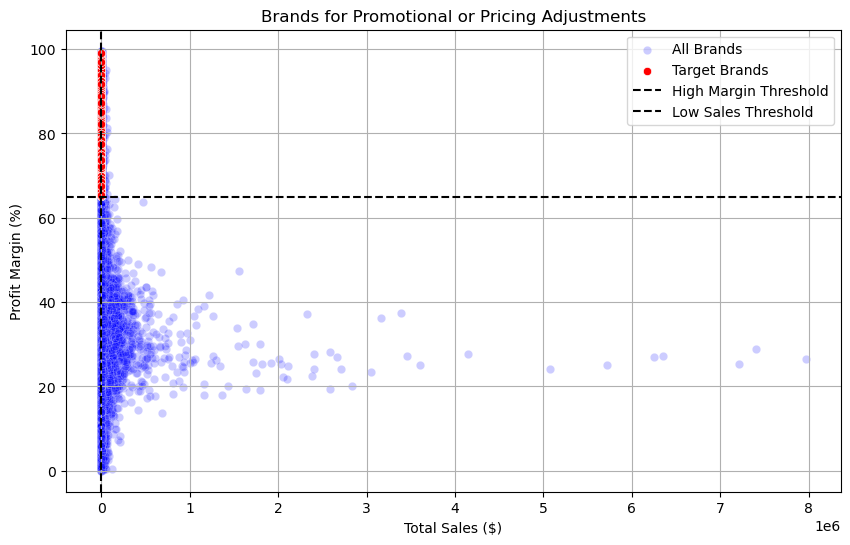

In [18]:
plt.figure(figsize=(10, 6))
sb.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands", alpha=0.2)
sb.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")

plt.axhline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()


This is hard to visualize, so we can filter out those products with higher than 10000 total sales

In [19]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<10000]

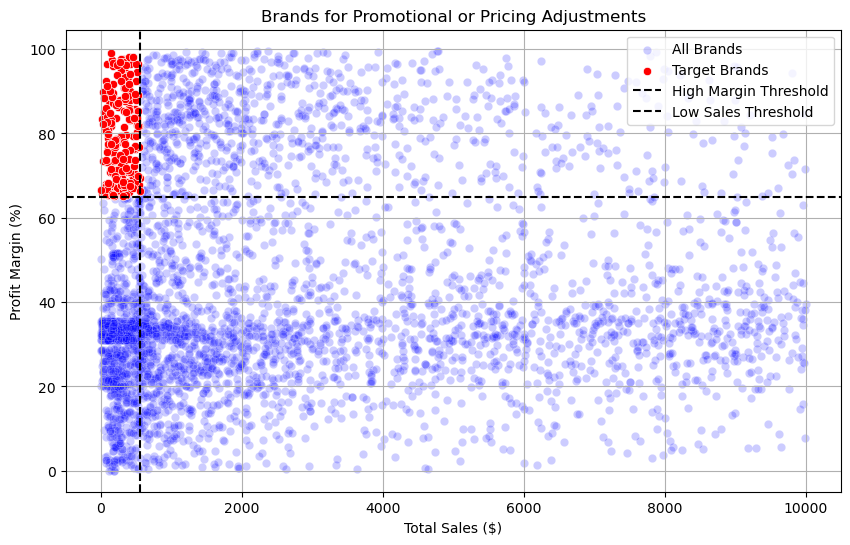

In [20]:
plt.figure(figsize=(10, 6))
sb.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands", alpha=0.2)
sb.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")

plt.axhline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()


#### 2: Which vendors and brands demonstrate the highest sales performance?

In [21]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value/1_000_000:.2f}M"
    elif value >= 1000:
        return f"{value/1_000:.2f}K"
    else:
        return str(value)

In [22]:
# Top Vendors & Brands by Sales Performance
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest (10) 
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest (10)

In [23]:
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      6.799010e+07
MARTIGNETTI COMPANIES         3.933036e+07
PERNOD RICARD USA             3.206320e+07
JIM BEAM BRANDS COMPANY       3.142302e+07
BACARDI USA INC               2.485482e+07
CONSTELLATION BRANDS INC      2.421875e+07
E & J GALLO WINERY            1.839990e+07
BROWN-FORMAN CORP             1.824723e+07
ULTRA BEVERAGE COMPANY LLP    1.650254e+07
M S WALKER INC                1.470646e+07
Name: TotalSalesDollars, dtype: float64

In [24]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [25]:
top_brands.apply(lambda x : format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

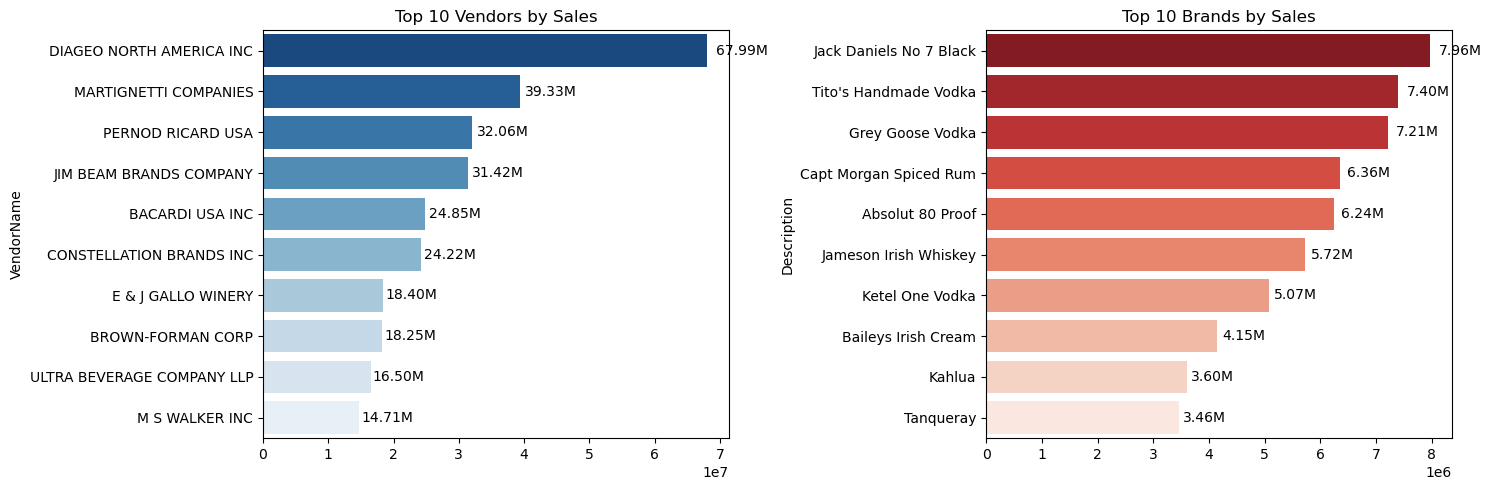

In [26]:
plt.figure(figsize=(15, 5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sb.barplot (y=top_vendors.index, x=top_vendors.values, palette="Blues_r") 
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars (bar.get_width()),
        ha='left', va='center', fontsize=10, color='black')
    
# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sb.barplot(y=top_brands.index.astype (str), x=top_brands.values, palette="Reds_r") 
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars (bar.get_width()),
        ha='left', va='center', fontsize=10, color='black')
    
plt.tight_layout()
plt.show()

#### 3: Which vendors contribute the most to total purchase dollars?

In [27]:
vendor_performance = df.groupby("VendorName").agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()

In [28]:
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53
...,...,...,...,...
114,WEIN BAUER INC,42694.64,13522.49,56217.13
115,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83
116,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20
117,WINE GROUP INC,5203801.17,3100242.11,8304043.28


In [29]:
# calculating the percentage of total purchase for each vendor
vendor_performance["PurchaseContribution%"] = vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53,0.000001
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94,0.000084
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81,0.000038
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16,0.000003
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53,0.000340
...,...,...,...,...,...
114,WEIN BAUER INC,42694.64,13522.49,56217.13,0.000139
115,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83,0.000971
116,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20,0.019121
117,WINE GROUP INC,5203801.17,3100242.11,8304043.28,0.016932


In [30]:
round(vendor_performance.sort_values("PurchaseContribution%", ascending=False),3)

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50097226.16,17892873.26,67990099.42,0.163
57,MARTIGNETTI COMPANIES,25502095.83,13828263.53,39330359.36,0.083
68,PERNOD RICARD USA,23851164.17,8212032.02,32063196.19,0.078
46,JIM BEAM BRANDS COMPANY,23494304.32,7928716.14,31423020.46,0.076
6,BACARDI USA INC,17432020.26,7422796.88,24854817.14,0.057
...,...,...,...,...,...
33,FANTASY FINE WINES CORP,128.64,198.95,327.59,0.000
107,UNCORKED,118.74,58.20,176.94,0.000
85,SILVER MOUNTAIN CIDERS,77.18,265.33,342.51,0.000
16,CAPSTONE INTERNATIONAL,54.64,192.23,246.87,0.000


In [31]:
vendor_performance["PurchaseContribution%"] = (
    vendor_performance["PurchaseContribution%"].round(3) * 100)
vendor_performance = vendor_performance.sort_values("PurchaseContribution%", ascending=False)

In [32]:
# Now displaying top 10 vendors
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.3
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.3
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.8
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.6
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.7
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,5.0
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.3
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.9
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.6
79,SAZERAC CO INC,9.71M,3.39M,13.10M,3.2


In [33]:
# Total contribution of the top 10 vendors in Total Purchases
top_vendors['PurchaseContribution%'].sum()

65.7

In [34]:
top_vendors['CummulativeContribution%'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,CummulativeContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.3,16.3
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.3,24.6
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.8,32.4
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.6,40.0
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.7,45.7
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,5.0,50.7
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.3,55.0
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.9,58.9
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.6,62.5
79,SAZERAC CO INC,9.71M,3.39M,13.10M,3.2,65.7


#### 4: How much of total procurement is dependent on the top vendors?

In [35]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(), 2)}%")

Total Purchase Contribution of top 10 vendors is 65.7%


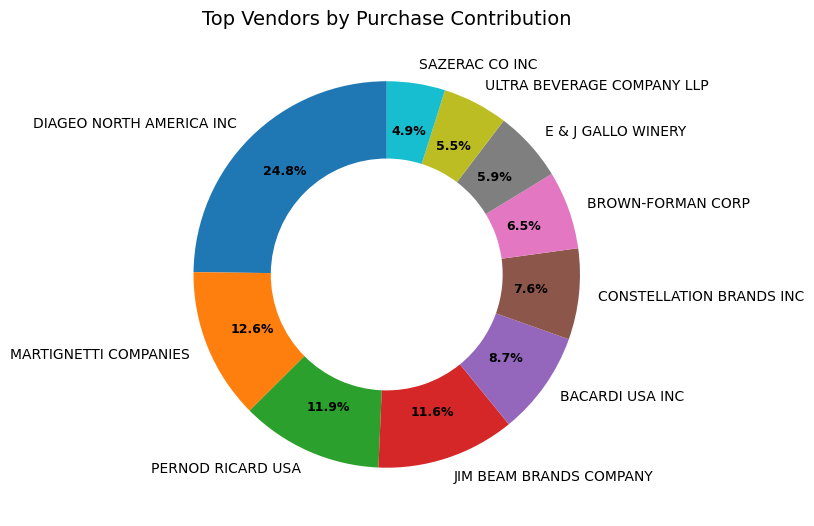

In [36]:
import matplotlib.pyplot as plt

# Limit vendor names to first 5 words
top_vendors['ShortName'] = top_vendors['VendorName'].apply(lambda x: ' '.join(str(x).split()[:5]))

# Create a donut chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    top_vendors['PurchaseContribution%'],
    labels=top_vendors['ShortName'],
    autopct='%1.1f%%',
    pctdistance=0.75,  # Move percentage text closer to center
    startangle=90,
    wedgeprops=dict(width=0.4)
)

# Formatting
plt.setp(texts, size=10)
plt.setp(autotexts, size=9, weight="bold")
ax.set_title("Top Vendors by Purchase Contribution", fontsize=14)
plt.tight_layout()
plt.show()


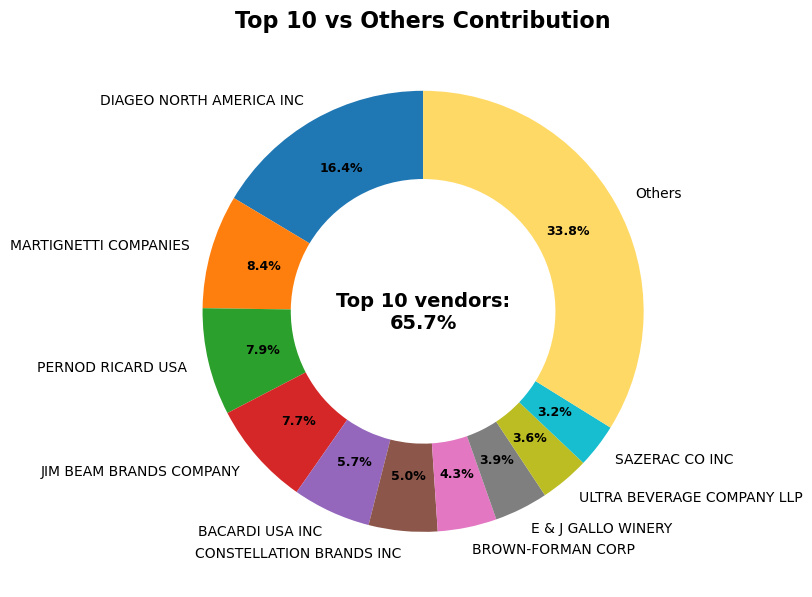

In [37]:
# Sort by PurchaseContribution% and get top 10
top_10 = vendor_performance.nlargest(10, 'PurchaseContribution%').copy()

# Calculate "Others"
others_value = vendor_performance['PurchaseContribution%'].sum() - top_10['PurchaseContribution%'].sum()

# Append "Others" row
others_row = pd.DataFrame({
    'VendorName': ['Others'],
    'PurchaseContribution%': [others_value]
})
chart_data = pd.concat([top_10, others_row], ignore_index=True)

# Short names for labels
chart_data['ShortName'] = chart_data['VendorName'].apply(lambda x: ' '.join(str(x).split()[:5]))

# Define colors: default palette + yellow for Others
base_colors = plt.cm.tab10.colors
colors = list(base_colors[:10]) + ['#FFD966']

# Create donut chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    chart_data['PurchaseContribution%'],
    labels=chart_data['ShortName'],
    autopct='%1.1f%%',
    colors=colors,
    pctdistance=0.75,
    startangle=90,
    wedgeprops=dict(width=0.4)
)

# Formatting
plt.setp(texts, size=10)
plt.setp(autotexts, size=9, weight="bold")

# Add center text
top_10_share = top_10['PurchaseContribution%'].sum()
ax.text(
    0, 0,
    f"Top 10 vendors:\n{top_10_share:.1f}%",
    ha='center', va='center', fontsize=14, weight='bold'
)

# Title & layout
ax.set_title("Top 10 vs Others Contribution", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


#### 5: Does purchasing in bulk reduce the unit cost, and what is the optimal purchase volume for cost savings?

In [38]:
df['unitPurchasePrice'] = df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [39]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio,unitPurchasePrice
0,7245,PROXIMO SPIRITS INC.,3065,Three Olives Grape Vodka,0.71,0.99,50.0,1,0.71,86.0,8.514000e+01,33.66,4.46,38994.78,84.43,99.166079,86.000000,119.915493,0.71
1,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,1.432800e+02,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388,1.47
2,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.980000e+00,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838,0.74
3,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,6.566000e+01,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829,0.39
4,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,1.595000e+01,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667,1.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4.223108e+06,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89
8561,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4.475973e+06,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17
8562,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4.538121e+06,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24
8563,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4.819073e+06,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19


In [40]:
# dividing the TotalPurcaseQuantity into small, medium and large sections based on quantiles
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'], q=3, labels=['Small', 'Medium', 'Large'])
df[['OrderSize', 'TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Small,1
1,Small,1
2,Small,2
3,Small,6
4,Small,2
...,...,...
8560,Large,138109
8561,Large,201682
8562,Large,187407
8563,Large,164038


In [41]:
# Now we have to calculate the mean of unitPurchasePrice for all the three categories
df.groupby('OrderSize')[['unitPurchasePrice']].mean()

,unitPurchasePrice
OrderSize,
Small,39.057543
Medium,15.486414
Large,10.777625


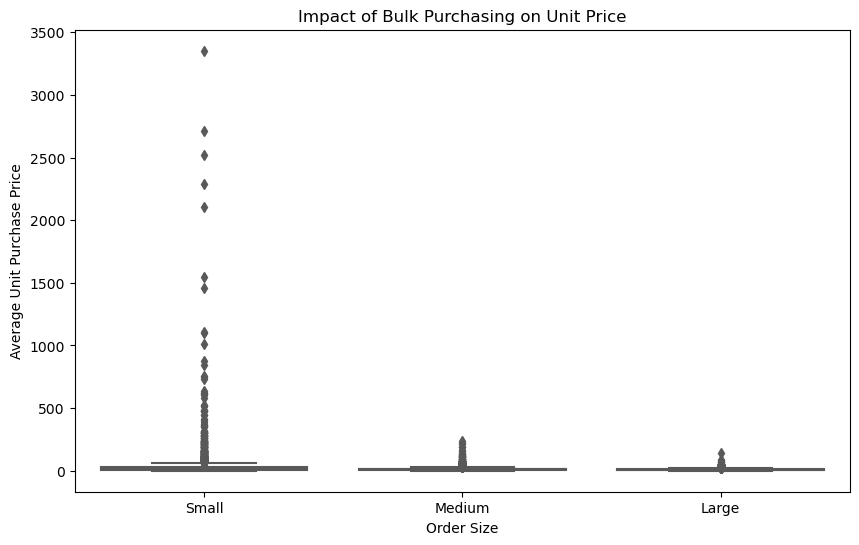

In [42]:
plt.figure(figsize=(10, 6))
sb.boxplot(data=df, x="OrderSize", y="unitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

- Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.  
<br>

- The price difference between Small and Large orders is substantial (-72% reduction in unit cost).  
<br>

- This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit prices.


#### 6: Which vendor has low inventory turnover, indicating excess stock and slow-mobing products?

In [43]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover').head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


#### 7: How much capital is locked in the unsold inventory per vendor, and which vendor contribute the most to it?

In [44]:
df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity'])*df['PurchasePrice']
print('Total Unsold Capital: ', format_dollars(df['UnsoldInventoryValue'].sum()))  

Total Unsold Capital:  2.71M


In [45]:
#Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby("VendorName") ["UnsoldInventoryValue"].sum().reset_index()

# Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values (by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor ['UnsoldInventoryValue'].apply(format_dollars) 
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


#### 8: What is the 95% confidence intervals for profit margins of top performing and low performing vendors

In [46]:
top_threshold = df ["TotalSalesDollars"].quantile (0.75) 
low_threshold = df ["TotalSalesDollars"].quantile (0.25)

In [47]:
top_vendors = df [df ["TotalSalesDollars"] >= top_threshold] ["ProfitMargin"].dropna() 
low_vendors = df [df ["TotalSalesDollars"] <= low_threshold] ["ProfitMargin"].dropna ()

In [48]:
top_vendors

3514    94.271857
3644    95.012530
3813    93.085860
4883    85.782102
5041    79.684817
          ...    
8560    28.412764
8561    27.139908
8562    24.675786
8563    21.062810
8564    25.297693
Name: ProfitMargin, Length: 2142, dtype: float64

In [49]:
 low_vendors

0       99.166079
1       98.974037
2       25.252525
3       96.436186
4       83.448276
          ...    
2840     7.239599
2860     1.677308
2863    12.007271
2912     6.145626
2933     4.111764
Name: ProfitMargin, Length: 2142, dtype: float64

In [50]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data)) # Standard error 
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: ( 30.74,  31.61), Mean:  31.17
Low Vendors 95% CI: ( 40.48,  42.62), Mean: 41.55


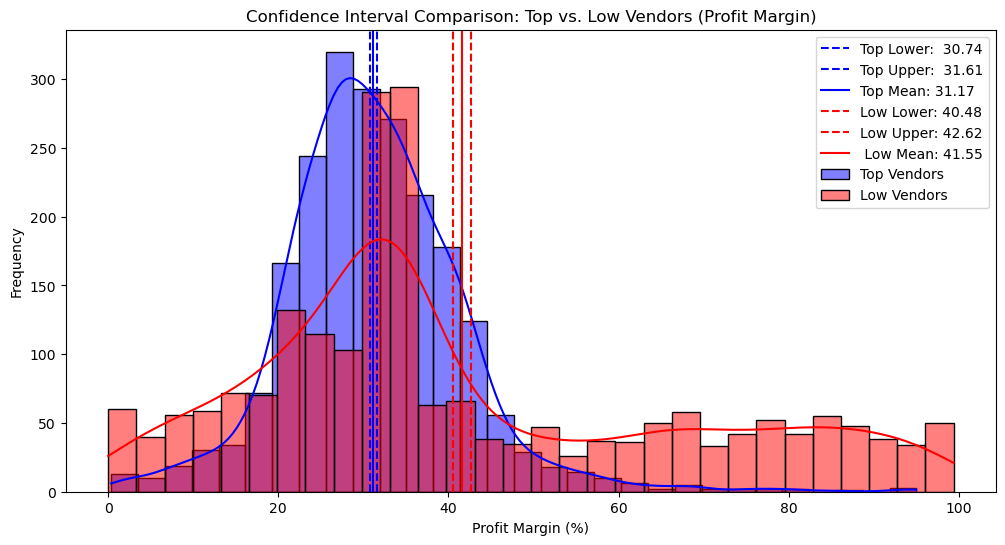

In [51]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors) 
low_mean, low_lower, low_upper = confidence_interval (low_vendors)

print (f"Top Vendors 95% CI: ({top_lower: .2f}, {top_upper: .2f}), Mean: {top_mean: .2f}") 
print (f"Low Vendors 95% CI: ({low_lower: .2f}, {low_upper: .2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

# Top Vendors Plot
sb.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors") 
plt.axvline (top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower: .2f}") 
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper: .2f}") 
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

#Low Vendors Plot
sb.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors") 
plt.axvline (low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}") 
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}") 
plt.axvline (low_mean, color="red", linestyle="-", label=f" Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)") 
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()

- The confidence interval for low-performing vendors (40.48% to 42.62%) is significantly higher than that of top-performing vendors (30.74% to 31.61%).  
&nbsp;  

- This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.  
&nbsp;  

- For High-Performing Vendors: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling strategies.  
&nbsp;  

- For Low-Performing Vendors: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.


#### 9: Is there a significant difference in profit margins between top performing and low performing vendors?

Hypothesis:
&nbsp; 

H₀ (Null Hypothesis): There is no significant difference in the mean profit margins of top performing and low performing vendors
&nbsp; 

H₁ (Alternate Hypothesis): The mean profit margins of top performing vendors and low performing vendors is significantly different

In [52]:
top_threshold = df ["TotalSalesDollars"].quantile (0.75) 
low_threshold = df ["TotalSalesDollars"].quantile (0.25)

top_vendors = df[df ["TotalSalesDollars"] >= top_threshold] ["ProfitMargin"].dropna() 
low_vendors = df[df ["TotalSalesDollars"] <= low_threshold] ["ProfitMargin"].dropna()

# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind (top_vendors, low_vendors, equal_var=False)

# Print results
print (f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject H.: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject Ho: No significant difference in profit margins.")

T-Statistic: -17.6440, P-Value: 0.0000
Reject H.: There is a significant difference in profit margins between top and low-performing vendors.


In [53]:
cursor = conn.cursor()
cursor.execute("DROP TABLE IF EXISTS vendor_sales_summary;")
conn.commit()
conn.close()